<a href="https://colab.research.google.com/github/Ago9/ML-SII/blob/master/progetto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [1]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive/')
!ls


Mounted at /content/drive/
drive  sample_data


word2vec implementation for caption

In [3]:
import re
import pandas as pd
import gensim 
from gensim.models import Word2Vec 
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
nltk.download('punkt')

data = pd.read_csv('./caption.csv')

data


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,caption,label
0,.\nUltimi bagni d'agosto... poi tutti a lavoro...,mare
1,#tropea #italy #bucht #italia #felsen #ship #y...,mare
2,𝕀𝕝 𝕞𝕒𝕣𝕖 𝕙𝕒 𝕢𝕦𝕖𝕤𝕥𝕒 𝕔𝕒𝕡𝕒𝕔𝕚𝕥à; 𝕣𝕖𝕤𝕥𝕚𝕥𝕦𝕚𝕤𝕔𝕖 𝕥𝕦𝕥𝕥𝕠 ...,mare
3,Total relax ❣️#mare#montagna#amore#amicizia#di...,mare
4,zezzenella is over 😅\n#feriefinite#😅#siritorna...,mare
...,...,...
95,Se non scali la montagna non ti potrai mai god...,montagna
96,"This summer is over, I hope we will be able to...",montagna
97,Marino's baby cows😍❤️\n#paluzza#paluzzacarnia#...,montagna
98,#montagna #calabria #relax #natura,montagna


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   caption  96 non-null     object
 1   label    100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [5]:
# elimino le righe nulle
data.dropna(axis=0, inplace=True)

data = data.astype('str')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 98
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   caption  96 non-null     object
 1   label    96 non-null     object
dtypes: object(2)
memory usage: 2.2+ KB


In [6]:
# pulizia del testo
def clean_text(sen):
   # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

# applico la pulizia
data.caption = data.caption.apply(lambda n: clean_text(n))


# uso il label encoder per trasformare i valori categorici in numerici
encoder = LabelEncoder()
data.label = encoder.fit_transform(data.label)

onehotencoder = OneHotEncoder()

y = onehotencoder.fit_transform(data.caption.values.reshape(-1,1)).toarray()



data

,caption,label
0,Ultimi bagni agosto poi tutti lavoro Tutti Sa...,0
1,tropea italy bucht italia felsen ship yacht s...,0
2,seaside mare estate estateaddosso estateitali...,0
3,Total relax mare montagna amore amicizia diver...,0
4,zezzenella is over feriefinite siritornaallano...,0
...,...,...
94,Tre Cime di Lavaredo Agosto Vista da Cima Pic...,1
95,Se non scali la montagna non ti potrai mai god...,1
96,This summer is over hope we will be able to tr...,1
97,Marino baby cows paluzza paluzzacarnia carnia ...,1


modello word2vec

In [7]:
caption = data.caption
label = data.label
token_train = []
label_train = []
token_test = []
label_test = []

# split dei dati in tranning e test set
X_train, X_test, y_train, y_test = train_test_split(caption, label, test_size = 0.25, random_state = 1000)

# tokenizzo i caption sia per il train sia per il test
for i in X_train:
  token_train.append(nltk.word_tokenize(i))
 
for j in X_test:
  token_test.append(nltk.word_tokenize(j))

print(token_train)
print(token_test)

# genero il modello w2v per il tranning_set

model_train = gensim.models.Word2Vec(token_train, min_count = 1,  
                              size = 50, window = 3) 

words = list(model_train.wv.vocab)
print(words)

X_train_w2v = model_train.wv.vectors

#informazioni su embedding
pretrained_weights = model_train.wv.vectors
vocab_size, emdedding_size = pretrained_weights.shape
print('Result embedding shape:', pretrained_weights.shape)

# genero il modello w2v per il test_set

model_test = gensim.models.Word2Vec(token_test, min_count = 1,  
                              size = 50, window = 3) 

words = list(model_test.wv.vocab)

X_test_w2v = model_test.wv.vectors



[['Non', 'ci', 'dovete', 'venire', 'in', 'Calabria', 'come', 'sempre', 'nofilter'], ['Summer', 'photographs', 'mare', 'sea', 'italy', 'summer', 'travel', 'italia', 'photography', 'picoftheday', 'love', 'nature', 'instagood', 'sun', 'photooftheday', 'beach', 'sunset', 'landscape', 'sky', 'beautiful', 'holiday', 'estate', 'instagram', 'photo', 'igersitalia', 'travelphotography', 'sardegna', 'sole', 'spiaggia', 'relax', 'sicily', 'instalike', 'sto', 'usando', 'tagsfinder', 'com', 'www', 'tagsfinder', 'com'], ['Una', 'piccola', 'prova', 'Preferite', 'una', 'foto', 'classica', 'un', 'animazione', 'come', 'questa', 'Fatemi', 'sapere', 'landscape', 'nature', 'photography', 'travel', 'landscapephotography', 'igersveneto', 'igersitalia', 'volgoveneto', 'paesaggio', 'igerslandscapes', 'paesaggioitaliano', 'mountains', 'montagna', 'dolomiti', 'dolomites', 'alps', 'cortina', 'dolomitesunesco', 'hiking', 'trekking', 'instanature', 'instadaily'], ['Il', 'paradiso', 'sotto', 'nostri', 'piedi', 'cos',

lstm con ingresso le word2vec


In [8]:
import keras
from keras import layers

model = keras.Sequential()
#strato di ingresso di dimensioni di vocab_size e uscita embedding_size
model.add(layers.Embedding(input_dim=vocab_size, output_dim=emdedding_size))

# strato lstm di dim pari all'output dell'embedding
model.add(layers.LSTM(emdedding_size))

# strato denso di uscita pari a vocab_size.
model.add(layers.Dense(vocab_size))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 50)          56750     
_________________________________________________________________
lstm (LSTM)                  (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1135)              57885     
Total params: 134,835
Trainable params: 134,835
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_w2v, y_train, epochs=5, batch_size=16, verbose=2)

# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

implementazione embedding

In [29]:
sentences_train, sentences_test, y_train, y_test = train_test_split(caption , label, test_size=0.25, random_state=1000)

from keras.preprocessing.text import Tokenizer

# uso tokenizer per tokenizzare i caption 
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(sentences_train)

# trasformo in sequenze
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1 

from keras.preprocessing.sequence import pad_sequences

maxlen = 100

# aggiungo del padding per portare tutti allo stessa lunghezza
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[ 25  41 246 247  16  30  66  87  67   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


lo stesso modello di sopra con ingresso le embedding

In [28]:
import keras
from keras import layers

model = keras.Sequential()
#strato di ingresso di dimensioni di vocab_size e uscita embedding_size
model.add(layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=maxlen))

# strato lstm di dim pari all'output dell'embedding
model.add(layers.LSTM(units=50))

# strato denso di uscita pari a vocab_size.
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           54200     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 74,451
Trainable params: 74,451
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(X_train, y_train, verbose=1, epochs=10)

# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/10
3/3 [==============================] - 0s 34ms/step - loss: 0.6928 - acc: 0.5417
Epoch 2/10
3/3 [==============================] - 0s 34ms/step - loss: 0.6916 - acc: 0.5417
Epoch 3/10
3/3 [==============================] - 0s 37ms/step - loss: 0.6908 - acc: 0.5417
Epoch 4/10
3/3 [==============================] - 0s 33ms/step - loss: 0.6901 - acc: 0.5417
Epoch 5/10
3/3 [==============================] - 0s 34ms/step - loss: 0.6892 - acc: 0.5417
Epoch 6/10
3/3 [==============================] - 0s 35ms/step - loss: 0.6899 - acc: 0.5417
Epoch 7/10
3/3 [==============================] - 0s 34ms/step - loss: 0.6901 - acc: 0.5417
Epoch 8/10
3/3 [==============================] - 0s 34ms/step - loss: 0.6911 - acc: 0.5417
Epoch 9/10
3/3 [==============================] - 0s 35ms/step - loss: 0.6913 - acc: 0.5417
Epoch 10/10
3/3 [==============================] - 0s 34ms/step - loss: 0.6914 - acc: 0.5417
Accuracy: 45.83


implementation of cnn for image recognition

cnn model

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.metrics import Accuracy

model = Sequential()
# strato convolutivo
model.add(Conv2D(32, 3, 3, input_shape= (150,150,3), activation='relu'))
# strato di pooling
model.add(MaxPooling2D(pool_size= (2,2)))
# flattering
model.add(Flatten())
# strato full-connected
model.add(Dense(128, activation='relu'))
# output - 1 perchè binario
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               2560128   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 2,561,153
Trainable params: 2,561,153
Non-trainable params: 0
_________________________________________________________________


In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_image_path = "/content/drive/My Drive/progetto/dataset/tranning_set"
test_image_path = "/content/drive/My Drive/progetto/dataset/test_set"
batch_size = 16

# data augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        train_image_path,  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        test_image_path,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 70 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [19]:
model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

Epoch 1/10
5/5 [==============================] - 3s 611ms/step - loss: 1.7656 - accuracy: 0.5143 - val_loss: 1.2413 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 3s 511ms/step - loss: 1.0143 - accuracy: 0.4857 - val_loss: 0.8185 - val_accuracy: 0.5667
Epoch 3/10
5/5 [==============================] - 3s 500ms/step - loss: 0.8564 - accuracy: 0.4286 - val_loss: 0.7156 - val_accuracy: 0.5000
Epoch 4/10
5/5 [==============================] - 3s 510ms/step - loss: 0.7265 - accuracy: 0.5714 - val_loss: 0.7199 - val_accuracy: 0.6000
Epoch 5/10
5/5 [==============================] - 3s 552ms/step - loss: 0.6710 - accuracy: 0.5714 - val_loss: 0.7249 - val_accuracy: 0.5000
Epoch 6/10
5/5 [==============================] - 3s 570ms/step - loss: 0.6063 - accuracy: 0.6429 - val_loss: 0.5991 - val_accuracy: 0.6000
Epoch 7/10
5/5 [==============================] - 3s 515ms/step - loss: 0.5904 - accuracy: 0.6429 - val_loss: 0.6374 - val_accuracy: 0.6000
Epoch 8/10
5/5 [====

modello finale 

In [31]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Embedding, Conv2D, MaxPooling2D, Flatten, LSTM
from keras.layers.merge import concatenate

input1 = Input(shape = (180,180, 3), name= 'image')
input2 = Input(shape=(None,), name= 'caption')

# first input

# convolution
x = Conv2D(32, 3, 3, input_shape= (150,150,3), activation='relu')(input1)
# pooling
x = MaxPooling2D(pool_size= (2,2))(x)
# flattering
x = Flatten()(x)
# full-connected 
x = Dense(128, activation='relu')(x)

x = Model(inputs=input1, outputs=x)

# second input

# embedding con in input vocab_size e uscita embedding_size del modello w2v
y = Embedding(input_dim=vocab_size, output_dim=emdedding_size)(input2)

# strato lstm di dim pari all'output dell'embedding
y = LSTM(emdedding_size)(y)

y = Dense(vocab_size)(y)

y = Model(inputs=input2, outputs=y)

final_model = concatenate([x.output, y.output])

predictions = Dense(1, activation='softmax', name='main_output')(final_model)

model = Model(inputs=[x.input, y.input], outputs=predictions)

model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 60, 60, 32)   896         image[0][0]                      
__________________________________________________________________________________________________
caption (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 30, 30, 32)   0           conv2d_3[0][0]                   
_______________________________________________________________________________________

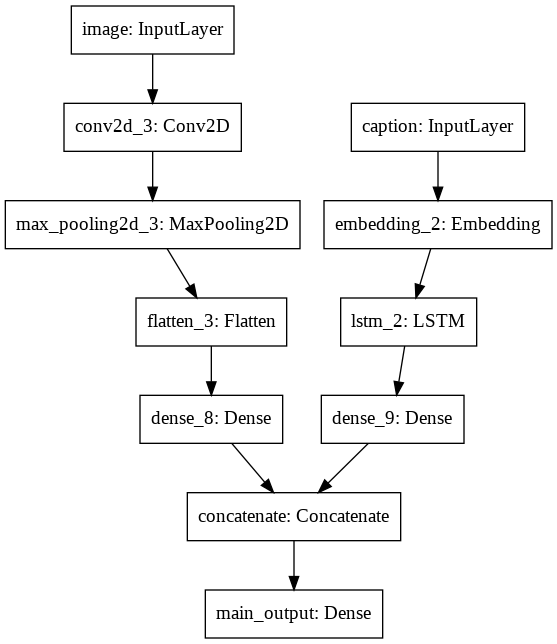

In [32]:
from keras.utils import plot_model

plot_model(model, to_file='./grafo_progetto.png')

In [ ]:
model.fit([train_generator, X_train], [validation_generator, y_train], epochs=10)